<a href="https://colab.research.google.com/github/PradnyaTayade/NLP/blob/main/NEWS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## for data
import pandas as pd
#Collections are used to store, retrieve, manipulate, and communicate aggregate data.
import collections
#JSON is often used to transport and parse big files and Very easy to read, write and manipulate​
import json
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
#it is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.​
import wordcloud
# for text processing
# can be used to work with Regular Expressions for text preprocessing.​
import re
import nltk
## for language detection
import langdetect
## for sentiment
from textblob import TextBlob
## for name entity recognition
import spacy
## for vectorizer
from sklearn import feature_extraction, manifold
## for word embedding
import gensim.downloader as gensim_api
## for topic modeling
import gensim

In [ ]:
lst_dics = []
with open('data.json', mode='r', errors='ignore') as json_file:
    for dic in json_file:
        lst_dics.append(json.loads(dic))
## print the first one      
print(lst_dics[:5])

[{'link': 'https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9', 'headline': 'Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters', 'category': 'U.S. NEWS', 'short_description': 'Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.', 'authors': 'Carla K. Johnson, AP', 'date': '2022-09-23'}, {'link': 'https://www.huffpost.com/entry/american-airlines-passenger-banned-flight-attendant-punch-justice-department_n_632e25d3e4b0e247890329fe', 'headline': 'American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video', 'category': 'U.S. NEWS', 'short_description': "He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.", 'authors': 'Mary Papenfuss', 'date': '2022-09-23'}, {'link': 'https://www.huffpost.com/en

In [ ]:
## create dtf
dtf = pd.DataFrame(lst_dics)
## filter categories
dtf = dtf[ dtf["category"].isin(['ENTERTAINMENT','POLITICS','TECH']) ][["category","headline"]]
## rename columns
dtf = dtf.rename(columns={"category":"y", "headline":"text"})
## print 5 random rows
dtf.sample(5)

,y,text
53842,POLITICS,David Duke Fundraising Letter Urges Louisianan...
9682,POLITICS,House Dems Reportedly Plan To Release Thousand...
39932,ENTERTAINMENT,Anti-LGBTQ Malaysian Censors Bend Slightly To ...
107566,POLITICS,The Dream Of Dogs Riding On Amtrak Is Tantaliz...
36254,POLITICS,Insensitive Washington Times Columnist Puts Hi...


In [ ]:
dtf.shape

(55068, 2)

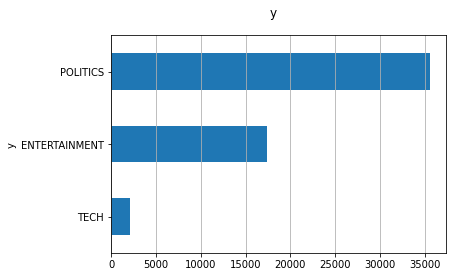

In [ ]:
x = "y"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
dtf[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [ ]:
txt = dtf["text"].iloc[0]
print(txt, " --> ", langdetect.detect(txt))

Twitch Bans Gambling Sites After Streamer Scams Folks Out Of $200,000  -->  en


In [ ]:
dtf['lang'] = dtf["text"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")
dtf.head()

In [ ]:
x = "lang"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
dtf[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [ ]:
dtf = dtf[dtf["lang"]=="en"]

In [ ]:
print("--- original ---")
print(dtf["text"].iloc[1])
print("--- cleaning ---")
txt = re.sub(r'[^\w\s]', '', str(dtf["text"].iloc[1]).lower().strip())
print(txt)
print("--- tokenization ---")
txt = txt.split()
print(txt)

In [ ]:
 nltk.download('stopwords')

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

In [ ]:
print("--- remove stopwords ---")
txt = [word for word in txt if word not in lst_stopwords]
print(txt)

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

In [ ]:
print("--- stemming ---")
ps = nltk.stem.porter.PorterStemmer()
print([ps.stem(word) for word in txt])
print("--- lemmatisation ---")
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in txt])

In [ ]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, lst_stopwords=None, flg_stemm=False, flg_lemm=True):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [ ]:
dtf["text_clean"] = dtf["text"].apply(lambda x: utils_preprocess_text(x, lst_stopwords, flg_stemm=False, flg_lemm=True))

In [ ]:
dtf.head()

In [ ]:
print(dtf["text"].iloc[0], " --> ", dtf["text_clean"].iloc[0])

In [ ]:
dtf['word_count'] = dtf["text"].apply(lambda x: len(str(x).split(" ")))
dtf['char_count'] = dtf["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
dtf['sentence_count'] = dtf["text"].apply(lambda x: len(str(x).split(".")))
dtf['avg_word_length'] = dtf['char_count'] / dtf['word_count']
dtf['avg_sentence_lenght'] = dtf['word_count'] / dtf['sentence_count']
dtf.head()

In [ ]:
x, y = "char_count", "y"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in dtf[y].unique():
    sns.distplot(dtf[dtf[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(dtf[dtf[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(dtf[y].unique())
ax[1].grid(True)
plt.show()

In [ ]:
dtf["sentiment"] = dtf["text"].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)
dtf.head()

In [ ]:
print(dtf["text"].iloc[0], " --> ", dtf["sentiment"].iloc[0])

In [ ]:
pip install Spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

In [ ]:
## call model
import spacy
ner = spacy.load("en_core_web_lg")
## tag text
txt = dtf["text"].iloc[0]
doc = ner(txt)
## display result
spacy.displacy.render(doc, style="ent")

In [ ]:
## tag text and exctract tags into a list
dtf["tags"] = dtf["text"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )
## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
dtf["tags"] = dtf["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []
for lst in dtf["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     dtf["tags_"+feature] = dtf["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))

## print result
dtf.head()

,y,text,lang,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment,...,tags_LAW,tags_TIME,tags_PERSON,tags_PRODUCT,tags_FAC,tags_LANGUAGE,tags_ORDINAL,tags_NORP,tags_QUANTITY,tags_GPE
13,TECH,Twitch Bans Gambling Sites After Streamer Scam...,en,twitch ban gambling site streamer scam folk 20...,11,59,1,5.363636,11.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0
20,ENTERTAINMENT,Golden Globes Returning To NBC In January Afte...,en,golden globe returning nbc january year offair,10,51,1,5.100000,10.000000,0.3000,...,0,0,0,0,0,0,0,0,0,0
21,POLITICS,Biden Says U.S. Forces Would Defend Taiwan If ...,en,biden say u force would defend taiwan china in...,10,50,3,5.000000,3.333333,0.0000,...,0,0,1,0,0,0,0,0,0,2
24,POLITICS,‘Beautiful And Sad At The Same Time’: Ukrainia...,en,beautiful sad time ukrainian cultural festival...,17,85,1,5.000000,17.000000,0.1125,...,0,0,0,0,0,0,0,1,0,0
28,ENTERTAINMENT,James Cameron Says He 'Clashed' With Studio Be...,en,james cameron say clashed studio avatar release,10,58,1,5.800000,10.000000,0.0000,...,0,0,1,0,0,0,0,0,0,0


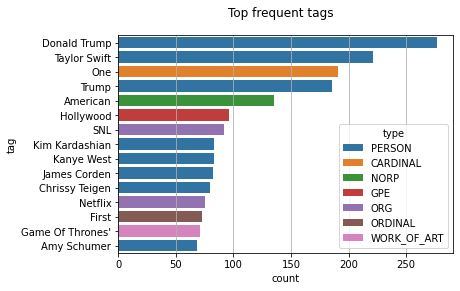

In [ ]:
y = "ENTERTAINMENT"
 
tags_list = dtf[dtf["y"]==y]["tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
dtf_tags["count"] = 1
dtf_tags = dtf_tags.groupby(['type',  'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", data=dtf_tags.iloc[:15,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

In [ ]:
## predict wit NER
txt = dtf["text"].iloc[0]
entities = ner(txt).ents
## tag text
tagged_txt = txt
for tag in entities:
    tagged_txt = re.sub(tag.text, "_".join(tag.text.split()), 
                        tagged_txt) 
## show result
print(tagged_txt)

Twitch Bans Gambling Sites After Streamer Scams Folks Out Of $200,000


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


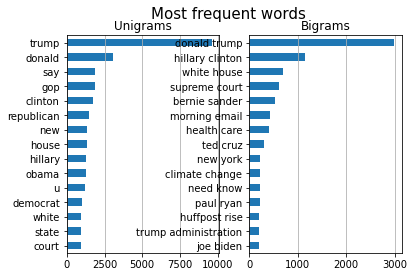

In [ ]:
 nltk.download('punkt')
y = "POLITICS"
corpus = dtf[dtf["y"]==y]["text_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:15,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:15,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

In [ ]:
lst_words = ["box office", "republican", "apple"]
## count
lst_grams = [len(word.split(" ")) for word in lst_words]
vectorizer = feature_extraction.text.CountVectorizer(
                 vocabulary=lst_words, 
                 ngram_range=(min(lst_grams),max(lst_grams)))
dtf_X = pd.DataFrame(vectorizer.fit_transform(dtf["text_clean"]).todense(), columns=lst_words)
## add the new features as columns
dtf = pd.concat([dtf, dtf_X.set_index(dtf.index)], axis=1)
dtf.head()

,y,text,lang,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment,...,tags_PRODUCT,tags_FAC,tags_LANGUAGE,tags_ORDINAL,tags_NORP,tags_QUANTITY,tags_GPE,box office,republican,apple
13,TECH,Twitch Bans Gambling Sites After Streamer Scam...,en,twitch ban gambling site streamer scam folk 20...,11,59,1,5.363636,11.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0
20,ENTERTAINMENT,Golden Globes Returning To NBC In January Afte...,en,golden globe returning nbc january year offair,10,51,1,5.100000,10.000000,0.3000,...,0,0,0,0,0,0,0,0,0,0
21,POLITICS,Biden Says U.S. Forces Would Defend Taiwan If ...,en,biden say u force would defend taiwan china in...,10,50,3,5.000000,3.333333,0.0000,...,0,0,0,0,0,0,2,0,0,0
24,POLITICS,‘Beautiful And Sad At The Same Time’: Ukrainia...,en,beautiful sad time ukrainian cultural festival...,17,85,1,5.000000,17.000000,0.1125,...,0,0,0,0,1,0,0,0,0,0
28,ENTERTAINMENT,James Cameron Says He 'Clashed' With Studio Be...,en,james cameron say clashed studio avatar release,10,58,1,5.800000,10.000000,0.0000,...,0,0,0,0,0,0,0,0,0,0


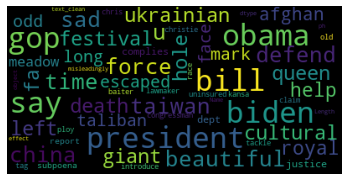

In [ ]:
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
nlp = gensim_api.load("glove-wiki-gigaword-300")

In [ ]:
word = "love"
nlp[word]

array([-4.5205e-01, -3.3122e-01, -6.3607e-02,  2.8325e-02, -2.1372e-01,
        1.6839e-01, -1.7186e-02,  4.7309e-02, -5.2355e-02, -9.8706e-01,
        5.3762e-01, -2.6893e-01, -5.4294e-01,  7.2487e-02,  6.6193e-02,
       -2.1814e-01, -1.2113e-01, -2.8832e-01,  4.8161e-01,  6.9185e-01,
       -2.0022e-01,  1.0082e+00, -1.1865e-01,  5.8710e-01,  1.8482e-01,
        4.5799e-02, -1.7836e-02, -3.3952e-01,  2.9314e-01, -1.9951e-01,
       -1.8930e-01,  4.3267e-01, -6.3181e-01, -2.9510e-01, -1.0547e+00,
        1.8231e-01, -4.5040e-01, -2.7800e-01, -1.4021e-01,  3.6785e-02,
        2.6487e-01, -6.6712e-01, -1.5204e-01, -3.5001e-01,  4.0864e-01,
       -7.3615e-02,  6.7630e-01,  1.8274e-01, -4.1660e-02,  1.5014e-02,
        2.5216e-01, -1.0109e-01,  3.1915e-02, -1.1298e-01, -4.0147e-01,
        1.7274e-01,  1.8497e-03,  2.4456e-01,  6.8777e-01, -2.7019e-01,
        8.0728e-01, -5.8296e-02,  4.0550e-01,  3.9893e-01, -9.1688e-02,
       -5.2080e-01,  2.4570e-01,  6.3001e-02,  2.1421e-01,  3.31

In [ ]:
nlp[word].shape

(300,)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Text(5, 2, 'love')

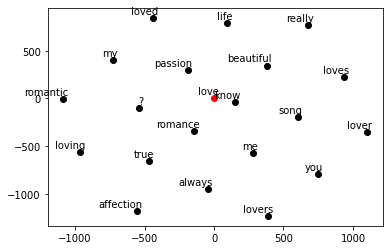

In [ ]:
## find closest vectors
labels, X, x, y = [], [], [], []
for t in nlp.most_similar(word, topn=20):
    X.append(nlp[t[0]])
    labels.append(t[0])
## reduce dimensions
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
new_values = pca.fit_transform(X)
for value in new_values:
    x.append(value[0])
    y.append(value[1])
## plot
fig = plt.figure()
for i in range(len(x)):
    plt.scatter(x[i], y[i], c="black")
    plt.annotate(labels[i], xy=(x[i],y[i]), xytext=(5,2), 
               textcoords='offset points', ha='right', va='bottom')
## add center
plt.scatter(x=0, y=0, c="red")
plt.annotate(word, xy=(0,0), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')

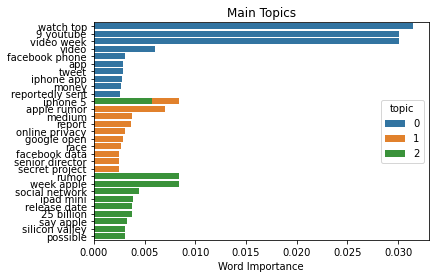

In [ ]:
y = "TECH"
corpus = dtf[dtf["y"]==y]["text_clean"]

## pre-process corpus
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
                     len(lst_words), 2)]
    lst_corpus.append(lst_grams)
## map words to an id
id2word = gensim.corpora.Dictionary(lst_corpus)
## create dictionary word:freq
dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] 
## train LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=3, random_state=123, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
   
## output
lst_dics = []
for i in range(0,3):
    lst_tuples = lda_model.get_topic_terms(i)
    for tupla in lst_tuples:
        lst_dics.append({"topic":i, "id":tupla[0], 
                         "word":id2word[tupla[0]], 
                         "weight":tupla[1]})
dtf_topics = pd.DataFrame(lst_dics, 
                         columns=['topic','id','word','weight'])
    
## plot
fig, ax = plt.subplots()
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()